52100924-Nguyễn Văn Anh Quân
52100922-Lê Phạm Hoàng Phương

Thông tin cơ bản về dữ liệu:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.con

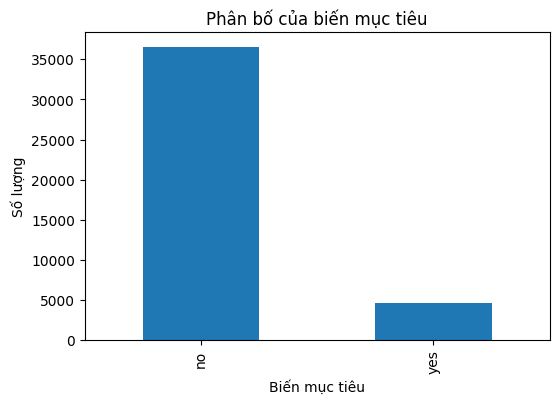


Các đặc trưng:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0           1.1

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



Độ quan trọng của các đặc trưng:
age : 0.07875296591955083
duration : 0.28221734467409754
campaign : 0.03881948521150478
pdays : 0.037258662127962965
previous : 0.013029594275922969
emp.var.rate : 0.020089669912549072
cons.price.idx : 0.028404490403387977
cons.conf.idx : 0.022087355001316776
euribor3m : 0.09965044471213425
nr.employed : 0.04358413402131157
job_housemaid : 0.011929762543876874
job_services : 0.00782157119451207
job_admin. : 0.003699704168469911
job_blue-collar : 0.0030741211221431692
job_technician : 0.006512771719642847
job_retired : 0.005493053078940514
job_management : 0.004156797047872568
job_unemployed : 0.006092954319770794
job_self-employed : 0.004262935391081654
job_unknown : 0.009559119528792022
job_entrepreneur : 0.0037507768966505467
job_student : 0.0015970346352938889
marital_married : 0.007026940256042416
marital_single : 0.011369721073656405
marital_divorced : 0.010703315394337548
marital_unknown : 0.0004918948852148794
education_basic.4y : 0.006011601561

In [ ]:
#1)Phân tích thống kê trên dữ liệu, vẽ các đồ thị để hiểu bài toán, hiểu dữ liệu. Tìm hiểu các đặc trưng và đánh gía vai trò của các đặc trưng đối với mục tiêu bài toán;
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# Đọc dữ liệu từ file CSV
# data = pd.read_csv('/content/drive/MyDrive/data/bank-additional.csv', delimiter=';')
# Tăng kích thước dữ liệu
data = pd.read_csv('/content/drive/MyDrive/data/bank-additional-full.csv', delimiter=';')

# Xem thông tin cơ bản về dữ liệu
print("Thông tin cơ bản về dữ liệu:")
print(data.head())
print("\nThông tin thống kê mô tả của dữ liệu:")
print(data.describe())

# Phân tích biến mục tiêu
target_counts = data['y'].value_counts()
print("\nSố lượng và phân bố của biến mục tiêu:")
print(target_counts)
plt.figure(figsize=(6, 4))
target_counts.plot(kind='bar')
plt.xlabel('Biến mục tiêu')
plt.ylabel('Số lượng')
plt.title('Phân bố của biến mục tiêu')
plt.show()

# Xem các đặc trưng
features = data.drop('y', axis=1)
print("\nCác đặc trưng:")
print(features.head())

# Mã hóa one-hot cho các đặc trưng chuỗi
categorical_features = features.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_features = encoder.fit_transform(features[categorical_features])

# Tạo danh sách tên đặc trưng đã mã hóa
encoded_feature_names = []
for i, column in enumerate(categorical_features):
    unique_values = features[column].unique()
    for value in unique_values:
        encoded_feature_names.append(f'{column}_{value}')

# Tạo DataFrame từ các đặc trưng đã mã hóa
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Kết hợp các đặc trưng đã mã hóa với các đặc trưng số
features_encoded = pd.concat([features.drop(categorical_features, axis=1), encoded_df], axis=1)

# Chia dữ liệu thành đặc trưng và biến mục tiêu
X = features_encoded
y = data['y']

# Xây dựng mô hình RandomForestClassifier
model = RandomForestClassifier()

# Đào tạo mô hình trên dữ liệu
model.fit(X, y)

# Đánh giá độ quan trọng của các đặc trưng
feature_importances = model.feature_importances_
print("\nĐộ quan trọng của các đặc trưng:")
for feature, importance in zip(X.columns, feature_importances):
    print(feature, ':', importance)

In [ ]:
#2)Ứng dụng các mô hình học máy cơ bản để giải quyết bài toán, bao gồm cả các mô hình thuộc Ensemble Learing;
#4)Áp dụng các kỹ thuật tránh Overfiting trên các mô hình của câu (2) để giải quyết bài toán;
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Đọc dữ liệu từ file CSV
# data = pd.read_csv('/content/drive/MyDrive/data/bank-additional.csv', delimiter=';')
# Tăng kích thước dữ liệu
data = pd.read_csv('/content/drive/MyDrive/data/bank-additional-full.csv', delimiter=';')

# Chọn các đặc trưng và biến mục tiêu
features = data.drop("y", axis=1)
target = data["y"]

# Chuyển đổi các biến hạng mục thành dạng số
features = pd.get_dummies(features)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Sử dụng mô hình Naive Bayes với kiểm soát tham số làm mịn
nb_model = GaussianNB(var_smoothing=1e-9)

# Sử dụng mô hình Naive Bayes Classifier không thuộc Ensemble Learing
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình Naive Bayes Classifier: {:.2f}".format(accuracy))

# Sử dụng K-Nearest Neighbors với kiểm soát tham số k
knn_model = KNeighborsClassifier(n_neighbors=5)
# Tạo pipeline với StandardScaler và K-Nearest Neighbors
knn_model_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))

#Sử dụng K-Nearest Neighbors không thuộc Ensemble Learing
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model_pipe.fit(X_train, y_train)
knn_y_pred = knn_model_pipe.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("Độ chính xác của mô hình K-Nearest Neighbors: {:.2f}".format(knn_accuracy))

# Áp dụng kiểm soát độ sâu của cây cho Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

#Sử dụng Random Forest thuộc Ensemble Learing
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Độ chính xác của mô hình Random Forest: {:.2f}".format(rf_accuracy))

# Áp dụng kiểm soát kích thước của mô hình cho Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)

# Sử dụng Gradient Boosting thuộc Ensemble Learing
gb_model = GradientBoostingClassifier(n_estimators=100)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print("Độ chính xác của mô hình Gradient Boosting: {:.2f}".format(gb_accuracy))

Độ chính xác của mô hình Naive Bayes Classifier: 0.86
Độ chính xác của mô hình K-Nearest Neighbors: 0.90
Độ chính xác của mô hình Random Forest: 0.91
Độ chính xác của mô hình Gradient Boosting: 0.92


In [ ]:
#3)Sử dụng Feed Forward Neural Network để giải quyết bài toán;
#4)Áp dụng các kỹ thuật tránh Overfiting trên các mô hình của câu (3) để giải quyết bài toán;
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

# Đọc dữ liệu từ file CSV
# data = pd.read_csv('/content/drive/MyDrive/data/bank-additional.csv', delimiter=';')
# Tăng kích thước dữ liệu
data = pd.read_csv('/content/drive/MyDrive/data/bank-additional-full.csv', delimiter=';')

# Chọn các đặc trưng và biến mục tiêu
features = data.drop("y", axis=1)
target = data["y"]

# Chuyển đổi biến mục tiêu thành dạng số bằng Label Encoding
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)  # Convert 'yes' to 1 and 'no' to 0

# Chuyển đổi các biến hạng mục thành dạng số bằng Label Encoding và One-Hot Encoding
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
features_encoded = pd.get_dummies(features, columns=categorical_columns, drop_first=True)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target_encoded, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Xây dựng mô hình Feed Forward Neural Network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))  # Thêm lớp dropout để tránh overfitting
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Huấn luyện mô hình
#Dùng early stopping để dừng quá trình huấn luyện khi độ chính xác trên tập kiểm tra ngừng cải thiện, giúp tránh overfitting.
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)   # Dừng sau 3 epochs không có cải thiện
# Compile mô hình
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

# Đánh giá mô hình
y_pred = model.predict(X_test_scaled)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]
accuracy = accuracy_score(y_test, y_pred_binary)
print("Độ chính xác của mô hình Feed Forward Neural Network: {:.2f}".format(accuracy))

# In confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# In classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))


Epoch 1/50
1030/1030 [==============================] - 6s 4ms/step - loss: 0.2511 - accuracy: 0.8954 - val_loss: 0.1937 - val_accuracy: 0.9093
Epoch 2/50
1030/1030 [==============================] - 4s 4ms/step - loss: 0.2043 - accuracy: 0.9045 - val_loss: 0.1907 - val_accuracy: 0.9111
Epoch 3/50
1030/1030 [==============================] - 3s 3ms/step - loss: 0.1949 - accuracy: 0.9093 - val_loss: 0.1897 - val_accuracy: 0.9104
Epoch 4/50
1030/1030 [==============================] - 3s 3ms/step - loss: 0.1920 - accuracy: 0.9086 - val_loss: 0.1865 - val_accuracy: 0.9107
Epoch 5/50
1030/1030 [==============================] - 3s 3ms/step - loss: 0.1885 - accuracy: 0.9099 - val_loss: 0.1848 - val_accuracy: 0.9124
Epoch 6/50
1030/1030 [==============================] - 3s 3ms/step - loss: 0.1871 - accuracy: 0.9110 - val_loss: 0.1849 - val_accuracy: 0.9119
Epoch 7/50
1030/1030 [==============================] - 4s 4ms/step - loss: 0.1851 - accuracy: 0.9123 - val_loss: 0.1872 - val_accuracy:

In [ ]:
#3)Sử dụng Reccurent Neural Network (hoặc mô thuộc loại này) để giải quyết bài toán;
#4)Áp dụng các kỹ thuật tránh Overfiting trên các mô hình của câu (3) để giải quyết bài toán;
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report


# Đọc dữ liệu từ file CSV
# data = pd.read_csv('/content/drive/MyDrive/data/bank-additional.csv', delimiter=';')
# Tăng kích thước dữ liệu
data = pd.read_csv('/content/drive/MyDrive/data/bank-additional-full.csv', delimiter=';')

# Chọn các đặc trưng và biến mục tiêu
features = data.drop("y", axis=1)
target = data["y"]

# Chuyển đổi biến mục tiêu thành dạng số bằng Label Encoding
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)  # Convert 'yes' to 1 and 'no' to 0

# Chuyển đổi các biến hạng mục thành dạng số bằng Label Encoding và One-Hot Encoding
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
features_encoded = pd.get_dummies(features, columns=categorical_columns, drop_first=True)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target_encoded, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape dữ liệu cho LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
model.add(Dropout(0.5)) # Thêm lớp dropout để tránh overfitting
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Huấn luyện mô hình
#Dùng early stopping để dừng quá trình huấn luyện khi độ chính xác trên tập kiểm tra ngừng cải thiện, giúp tránh overfitting.
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)  # Dừng sau 3 epochs không có cải thiện
# Compile mô hình
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test), callbacks=[early_stopping])

# Đánh giá mô hình
y_pred = model.predict(X_test_reshaped)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]
accuracy = accuracy_score(y_test, y_pred_binary)
print("Độ chính xác của mô hình Long Short-Term Memory: {:.2f}".format(accuracy))
# Tính confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# In confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# In classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))

Epoch 1/50
1030/1030 [==============================] - 8s 6ms/step - loss: 0.2366 - accuracy: 0.8996 - val_loss: 0.1902 - val_accuracy: 0.9124
Epoch 2/50
1030/1030 [==============================] - 6s 6ms/step - loss: 0.1937 - accuracy: 0.9090 - val_loss: 0.1870 - val_accuracy: 0.9131
Epoch 3/50
1030/1030 [==============================] - 9s 9ms/step - loss: 0.1880 - accuracy: 0.9122 - val_loss: 0.1865 - val_accuracy: 0.9128
Epoch 4/50
1030/1030 [==============================] - 8s 7ms/step - loss: 0.1855 - accuracy: 0.9121 - val_loss: 0.1846 - val_accuracy: 0.9147
Epoch 5/50
1030/1030 [==============================] - 11s 11ms/step - loss: 0.1835 - accuracy: 0.9122 - val_loss: 0.1841 - val_accuracy: 0.9134
Epoch 6/50
1030/1030 [==============================] - 6s 6ms/step - loss: 0.1827 - accuracy: 0.9125 - val_loss: 0.1828 - val_accuracy: 0.9148
Epoch 7/50
1030/1030 [==============================] - 4s 4ms/step - loss: 0.1800 - accuracy: 0.9136 - val_loss: 0.1849 - val_accurac